
## Ионов Тимур ИУ9-71Б
### Лабораторная работа N9 «Изучение скорости сходимости однопараметрического метода» 

In [1]:
import numpy as np
from copy import deepcopy
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm_notebook as tqdm
from matplotlib.pyplot import figure
from numpy.linalg import norm
import numpy as np


In [2]:
def gen_matrix(n, a=0, b=1):
    x = np.random.uniform(a, b, size=(n, n))
    x = (x + x.T)/2
    try:
        np.linalg.cholesky(x)
        return x
    except:
        return gen_matrix(n, a, b)

In [103]:
def solve(A, f, t, eps=1e-5):
    n = A.shape[0]

    eigs = np.linalg.eigvals(A)
    x = np.zeros_like(f)
    
    P = np.eye(n) - t * A
    g = t * f

    x = np.zeros_like(f)
    r = np.ones_like(f)
    c = 0
    while True:
        c += 1
        prev_x = x
        prev_r = r
        x = np.dot(P, x) + g
        r = norm(x - prev_x)
        mus = 1 - t * eigs
        if norm(prev_r - max(mus**2)*r) < eps:
            return x, c, norm(r)
       

In [104]:
n = 4
a = -3
b = 3

In [105]:
A = gen_matrix(n, a, b)
f = np.random.uniform(size=n)

In [106]:
x = np.linalg.solve(A, f)

In [107]:
eigs = np.linalg.eigvals(A)
l_min = np.min(eigs)
l_max = np.max(eigs)
t_opt = 2 / (l_min + l_max)

In [117]:
cs = []
rs = []
xrs = []
ts = []
for t in np.linspace(0.1, 2/l_max-0.01, 100):
    x_iter, c, r = solve(A.copy(), f.copy(), t, eps=1e-3)
    cs.append(c)
    rs.append(r)
    xrs.append(norm(x-x_iter))
    ts.append(t)

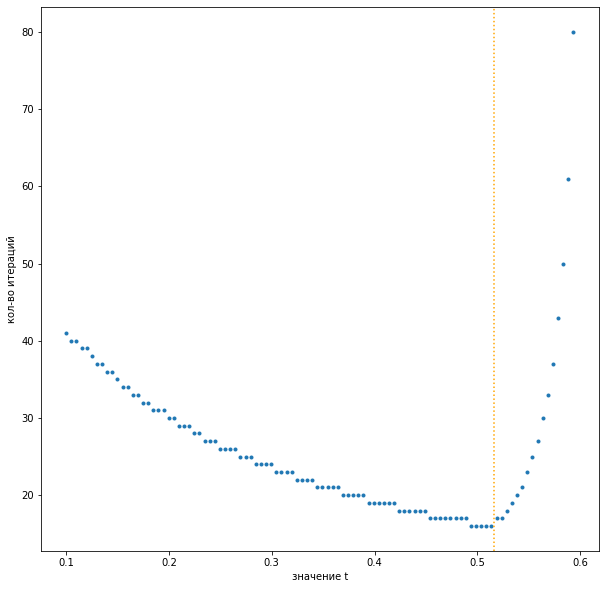

In [118]:
plt.figure(figsize=(10, 10))
plt.ylabel('кол-во итераций', fontsize=10)
plt.xlabel('значение t', fontsize=10)
plt.plot(ts, cs, '.')
plt.axvline(x=t_opt, linestyle=':', color='orange')

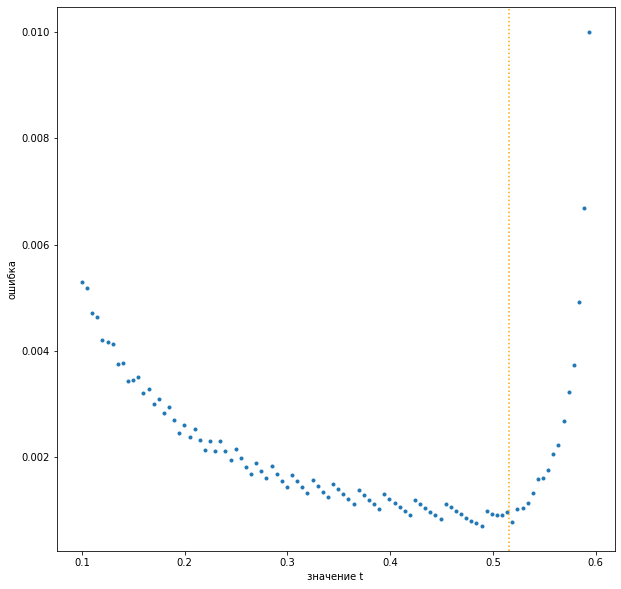

In [119]:
plt.figure(figsize=(10, 10))
plt.ylabel('ошибка', fontsize=10)
plt.xlabel('значение t', fontsize=10)
plt.plot(ts, rs, '.')
plt.axvline(x=t_opt, linestyle=':', color='orange')

In [120]:
!jupyter-nbconvert --to PDFviaHTML lab9.ipynb

[NbConvertApp] Converting notebook lab9.ipynb to PDFviaHTML
[NbConvertApp] Writing 140069 bytes to lab9.pdf
